In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [3]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df["Season"] == "Summer"]

In [6]:
df.shape

(222552, 15)

In [7]:
region_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [8]:
df = df.merge(region_df,on="NOC",how="left")

In [9]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [10]:
df["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df["Medal"].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [15]:
df = pd.concat([df,pd.get_dummies(df["Medal"])],axis=1)

In [16]:
df.groupby("region").sum()[["Gold","Bronze","Silver"]].sort_values("Gold",ascending=False).reset_index()

region    Gold  Bronze  Silver
0              USA  2472.0  1197.0  1333.0
1           Russia  1220.0   994.0   974.0
2          Germany  1075.0  1064.0   987.0
3               UK   635.0   620.0   729.0
4            Italy   518.0   454.0   474.0
..             ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0

[205 rows x 4 columns]

In [17]:
df[(df["NOC"]=="IND")&(df["Medal"]=="Gold")]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

In [18]:
medal_tally = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])

In [19]:
medal_tally = medal_tally.groupby("region").sum()[["Gold","Bronze","Silver"]].sort_values("Gold",ascending=False).reset_index()

In [20]:
medal_tally["total"] = medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"]

In [21]:
medal_tally

region    Gold  Bronze  Silver   total
0              USA  1035.0   708.0   802.0  2545.0
1           Russia   592.0   487.0   498.0  1577.0
2          Germany   444.0   491.0   457.0  1392.0
3               UK   278.0   300.0   317.0   895.0
4           France   234.0   287.0   256.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]

In [22]:
years = df["Year"].unique().tolist()

In [23]:
years.sort()

In [24]:
years.insert(0,"overall")

In [25]:
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [26]:
country = np.unique(df["region"].dropna().values).tolist()

In [27]:
country.sort()

In [28]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [29]:
country.insert(0,"overall")

In [30]:
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [31]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])
    flag = 0
    if year == "Overall" and country == "Overall":
        temp_df = medal_df
    if year == "Overall" and country != "Overall":
        flag = 1
        temp_df = medal_df[medal_df["region"] == country]
    if year != "Overall" and country == "Overall":
        temp_df = medal_df[medal_df["Year"] == int(year)]
    if year != "Overall" and country != "Overall":
        temp_df = medal_df[(medal_df["Year"] == year) & (medal_df["region"] == country)]
        
    if flag == 1:
        x = temp_df.groupby("year").sum()[["Gold","Bronze","Silver"]].sort_values("Year").reset_index()
    else:
        x = temp_df.groupby("region").sum()[["Gold","Bronze","Silver"]].sort_values("Gold",ascending=False).reset_index()
        
    x["total"] = x["Gold"] + x["Silver"] + x["Bronze"]
    
    print(x)

In [32]:
medal_df = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])

In [33]:
medal_df

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

In [34]:
medal_df[medal_df["region"] == "India"]

ID                                           Name Sex   Age  \
436        281                                 S. Abdul Hamid   M   NaN   
437        281                                 S. Abdul Hamid   M   NaN   
790        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
791        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
792        512                Shiny Kurisingal Abraham-Wilson   F  23.0   
...        ...                                            ...  ..   ...   
216942  132143                            Vikas Krishan Yadav   M  24.0   
216985  132177                           Mohammad Anas Yahiya   M  21.0   
218411  133029  Thyadathuvilla Chandrapillai "T. C." Yohannan   M  29.0   
222416  135480                                   Geeta Zutshi   F  23.0   
222417  135480                                   Geeta Zutshi   F  27.0   

        Height  Weight   Team  NOC        Games  Year  Season            City  \
436        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
437        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
790      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
791      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
792      167.0    53.0  India  IND  1988 Summer  1988  Summer           Seoul   
...        ...     ...    ...  ...          ...   ...     ...             ...   
216942   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
216985   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
218411   174.0    62.0  India  IND  1976 Summer  1976  Summer        Montreal   
222416   167.0    51.0  India  IND  1980 Summer  1980  Summer          Moskva   
222417   167.0    51.0  India  IND  1984 Summer  1984  Summer     Los Angeles   

            Sport                                   Event Medal region notes  \
436     Athletics      Athletics Men's 110 metres Hurdles   NaN  India   NaN   
437     Athletics      Athletics Men's 400 metres Hurdles   NaN  India   NaN   
790     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
791     Athletics  Athletics Women's 4 x 400 metres Relay   NaN  India   NaN   
792     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
...           ...                                     ...   ...    ...   ...   
216942     Boxing               Boxing Men's Middleweight   NaN  India   NaN   
216985  Athletics              Athletics Men's 400 metres   NaN  India   NaN   
218411  Athletics               Athletics Men's Long Jump   NaN  India   NaN   
222416  Athletics            Athletics Women's 800 metres   NaN  India   NaN   
222417  Athletics          Athletics Women's 3,000 metres   NaN  India   NaN   

        Bronze  Gold  Silver  
436          0     0       0  
437          0     0       0  
790          0     0       0  
791          0     0       0  
792          0     0       0  
...        ...   ...     ...  
216942       0     0       0  
216985       0     0       0  
218411       0     0       0  
222416       0     0       0  
222417       0     0       0  

[687 rows x 20 columns]

In [35]:
fetch_medal_tally(df,year=1900,country="India")

  region  Gold  Bronze  Silver  total
0  India     0       0       2      2


## Overall Analysis

In [36]:
df["Year"].unique().shape[0]-1

28

In [37]:
df["City"].unique().shape

(23,)

In [38]:
df["Sport"].unique().shape

(52,)

In [39]:
df["Event"].unique().shape

(651,)

In [40]:
df["Name"].unique().shape

(116122,)

In [41]:
df["region"].unique().shape

(206,)

In [42]:
nations_over_time = df.drop_duplicates(["Year","region"])["Year"].value_counts().reset_index().sort_values("index")

In [43]:
nations_over_time.rename(columns={"index":"Edition","Year":"No of Countries"},inplace=True)

In [44]:
nations_over_time

Edition  No of Countries
28     1896               12
22     1900               31
27     1904               14
26     1906               20
25     1908               22
24     1912               29
23     1920               29
21     1924               45
20     1928               46
19     1932               47
18     1936               49
17     1948               59
16     1952               67
15     1956               71
13     1960               83
11     1964               93
10     1968              111
9      1972              120
12     1976               91
14     1980               80
8      1984              139
7      1988              156
6      1992              168
5      1996              196
4      2000              199
3      2004              200
2      2008              202
1      2012              203
0      2016              204

In [45]:
import plotly.express as px

In [46]:
fig = px.line(nations_over_time, x="Edition", y="No of Countries")
fig.show()

In [47]:
df.drop_duplicates(["Year","Event"])["Year"].value_counts().reset_index().sort_values("index")

index  Year
28   1896    43
26   1900    90
25   1904    95
27   1906    74
23   1908   109
24   1912   107
14   1920   158
20   1924   131
22   1928   122
21   1932   131
18   1936   150
15   1948   153
19   1952   149
16   1956   151
17   1960   150
13   1964   163
12   1968   172
11   1972   193
10   1976   198
9    1980   203
8    1984   221
7    1988   237
6    1992   257
5    1996   271
4    2000   300
3    2004   301
1    2008   302
2    2012   302
0    2016   306

In [48]:
x = df.drop_duplicates(["Year","Sport","Event"])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

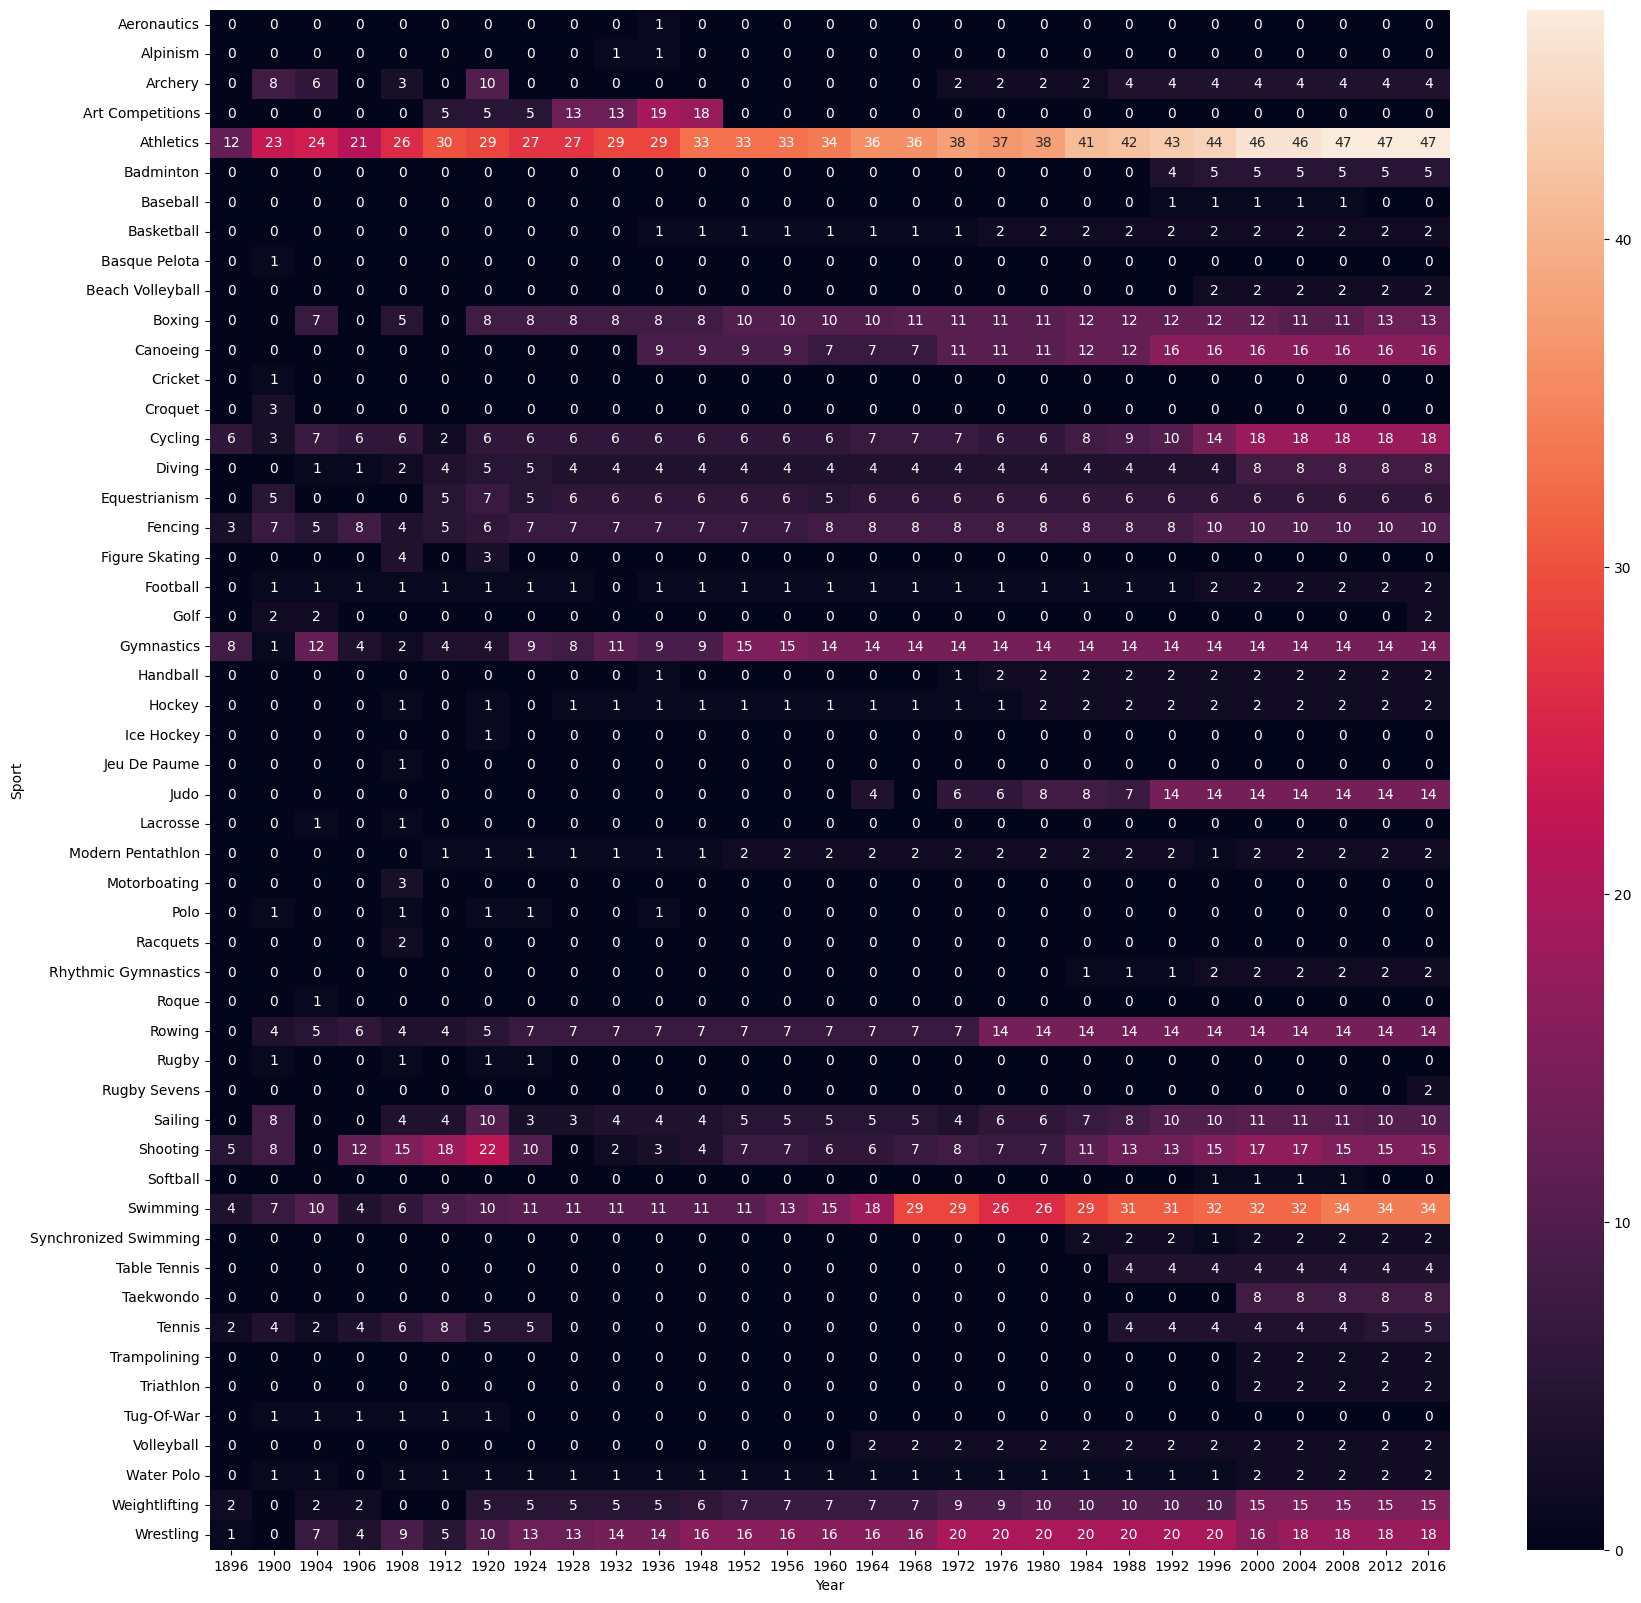

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index="Sport",columns="Year",values="Event",aggfunc="count").fillna(0).astype("int"),annot=True)

In [50]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=["Medal"])
    
    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]
    x= temp_df["Name"].value_counts().reset_index().head(15).merge(df,left_on="index",right_on="Name",how="left")[["index","Name_x","Sport","region"]].drop_duplicates("index")
    x.rename(columns={"index":"Name","Name_x":"Medals"},inplace=True)
    return x

In [51]:
most_successful(df,"Overall")

Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                          Aleksey Yuryevich Nemov      12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
195                           Birgit Fischer-Schmidt      12    Canoeing   
208                               Ryan Steven Lochte      12    Swimming   
222                             Paavo Johannes Nurmi      12   Athletics   
234                                       Sawao Kato      12  Gymnastics   
258                    Natalie Anne Coughlin (-Hall)      12    Swimming   
270                   Matthew Nicholas "Matt" Biondi      11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany  
208      USA  
222  Finland  
234    Japan  
258      USA  
270      USA

## Country Wise

In [52]:
temp_df = df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"],inplace=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
new_df = temp_df[temp_df["region"] == "USA"]
final_df = new_df.groupby("Year").count()["Medal"].reset_index()

In [54]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

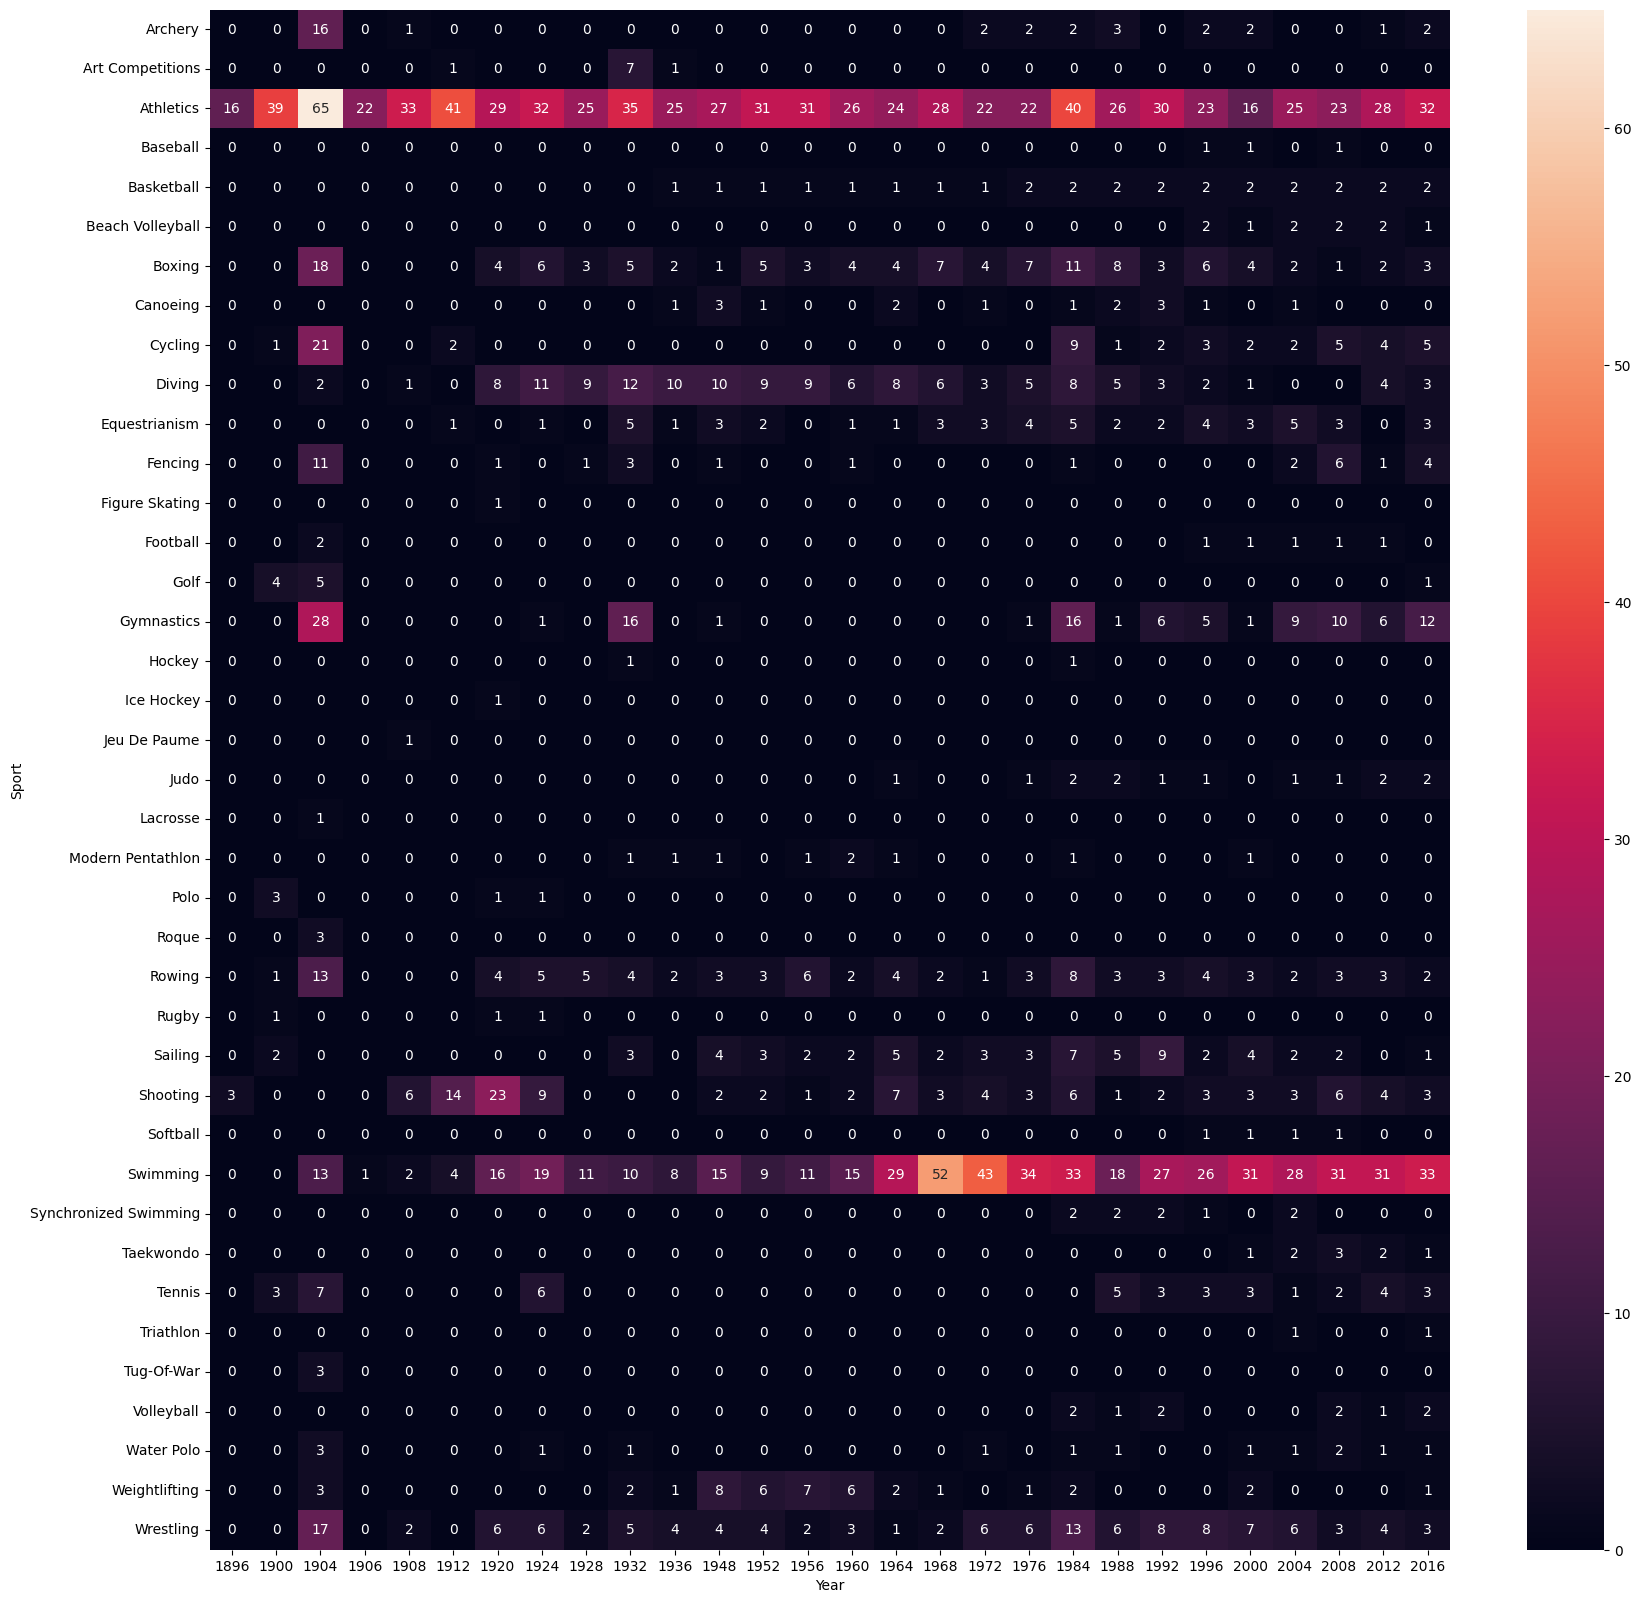

In [55]:
new_df = temp_df[temp_df["region"] == "USA"]
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index="Sport",columns="Year",values="Medal",aggfunc="count").fillna(0),annot=True)

In [56]:
def most_successful(df,country):
    temp_df = df.dropna(subset=["Medal"])
    
    temp_df = temp_df[temp_df["region"] == country]
    
    x= temp_df["Name"].value_counts().reset_index().head(15).merge(df,left_on="index",right_on="Name",how="left")[["index","Name_x","Sport"]].drop_duplicates("index")
    x.rename(columns={"index":"Name","Name_x":"Medals"},inplace=True)
    return x

In [57]:
most_successful(df,"India")

Name  Medals      Sport
0           Udham Singh Kular       4     Hockey
4      Leslie Walter Claudius       4     Hockey
8       Shankar Pillay Laxman       3     Hockey
11        Ranganathan Francis       3     Hockey
14        Richard James Allen       3     Hockey
17               Balbir Singh       3     Hockey
20     Harbinder Singh Chimni       3     Hockey
23  Balbir Singh Dosanjh, Sr.       3     Hockey
26  Victor John "V. J." Peter       3     Hockey
29           Dhyan Chand Bais       3     Hockey
32            Prithipal Singh       3     Hockey
35       Randhir Singh Gentle       3     Hockey
38            Roop Singh Bais       2     Hockey
40           Hari Pal Kaushik       2     Hockey
42       Sushil Kumar Solanki       2  Wrestling

In [58]:
import plotly.figure_factory as ff

In [59]:
athlete_df = df.drop_duplicates(subset=["Name","region"])

In [60]:
athlete_df["Age"]

0         24.0
1         23.0
2         24.0
3         34.0
4         18.0
          ... 
222544    19.0
222546    23.0
222548    21.0
222549    24.0
222551    33.0
Name: Age, Length: 116885, dtype: float64

In [61]:
fig = ff.create_distplot([athlete_df["Age"].dropna()],["Age Distribution"],show_hist=False,show_rug=False)
fig.show()

In [62]:
athlete_df["Medal"].fillna("No Medal",inplace=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

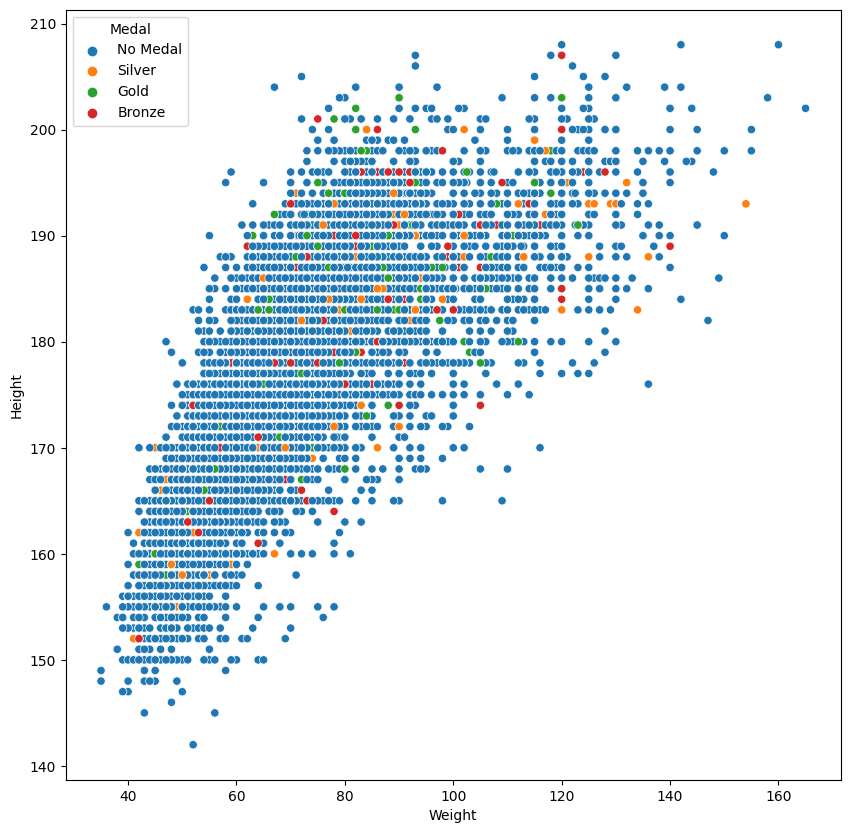

In [63]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df["Sport"] == "Athletics"]
sns.scatterplot(temp_df["Weight"],temp_df["Height"],hue=temp_df["Medal"])